  ## Our objective
To perform Exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`


### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 


In [3]:
df=pd.read_csv(r"\dataset_part_2.csv")
df.shape

(90, 18)

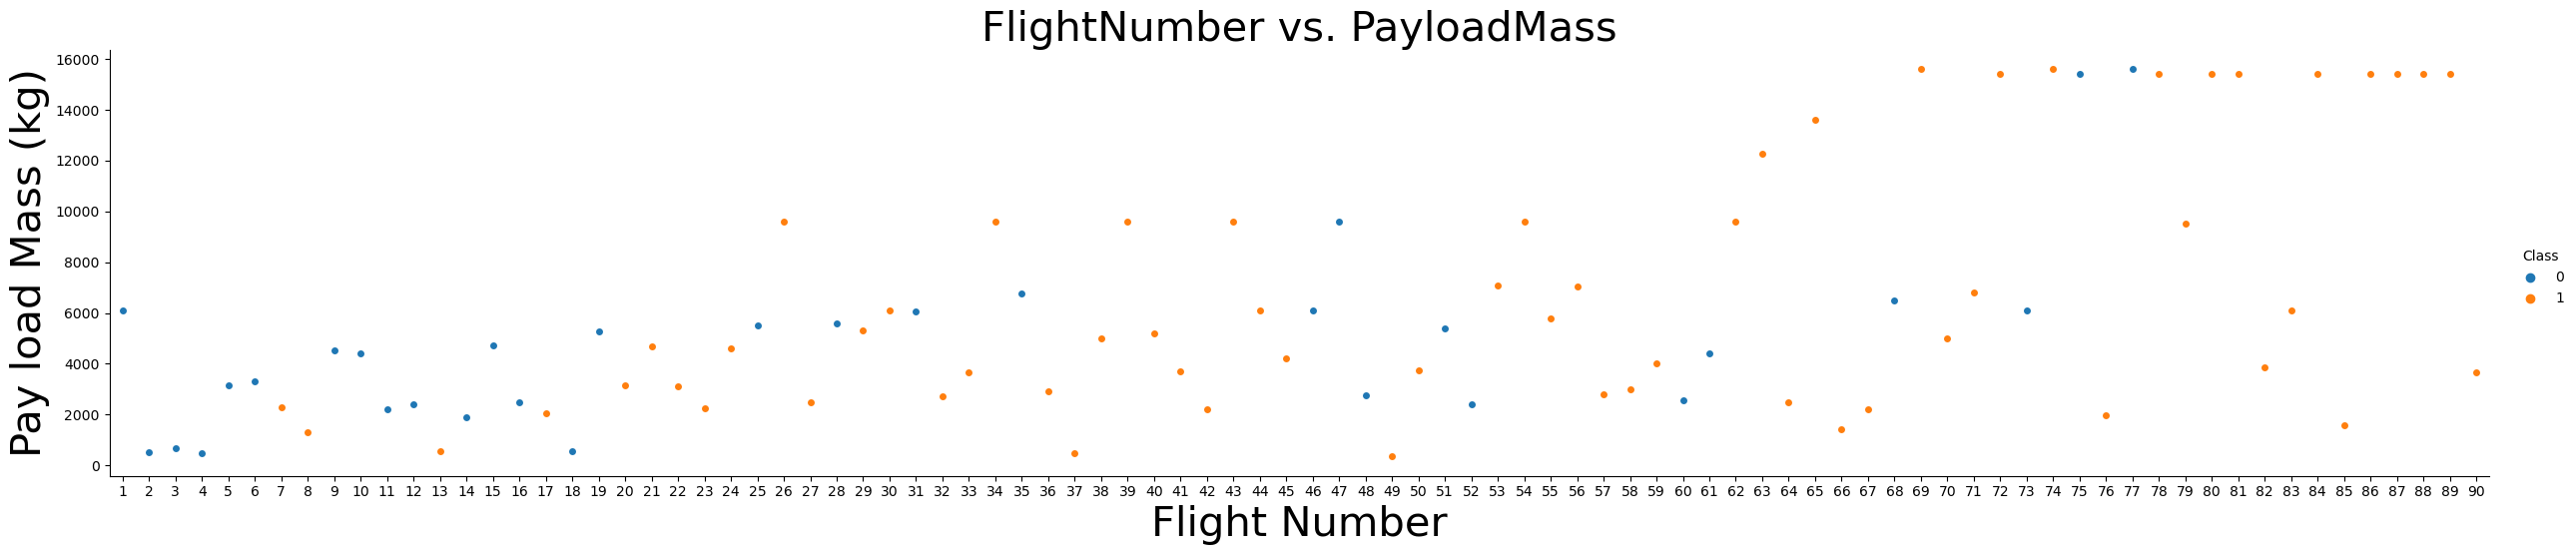

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df1, aspect = 5)
plt.xlabel("Flight Number",fontsize=30)
plt.ylabel("Pay load Mass (kg)",fontsize=30)
plt.title('FlightNumber vs. PayloadMass', fontsize=30)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


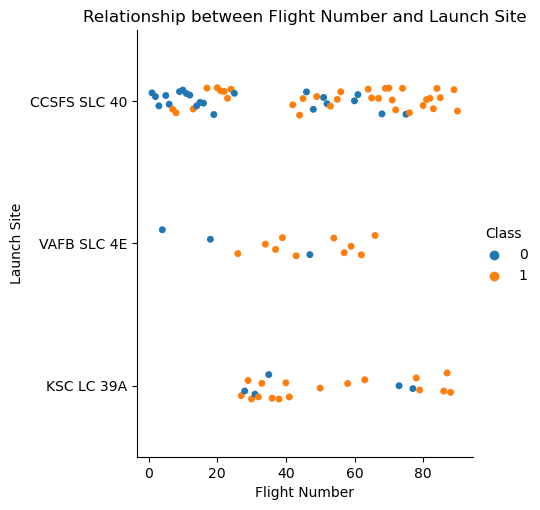

In [17]:
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Relationship between Flight Number and Launch Site')
plt.show()

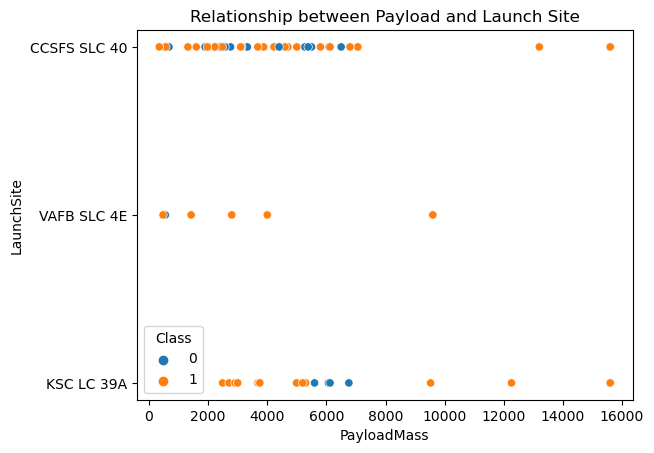

In [25]:
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class')
plt.title('Relationship between Payload and Launch Site')
plt.show()

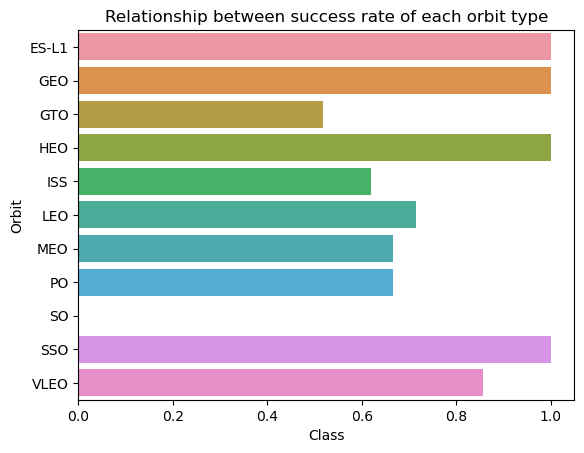

In [4]:
t=df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(data=t, x='Class', y='Orbit')
plt.title('Relationship between success rate of each orbit type')
plt.show()

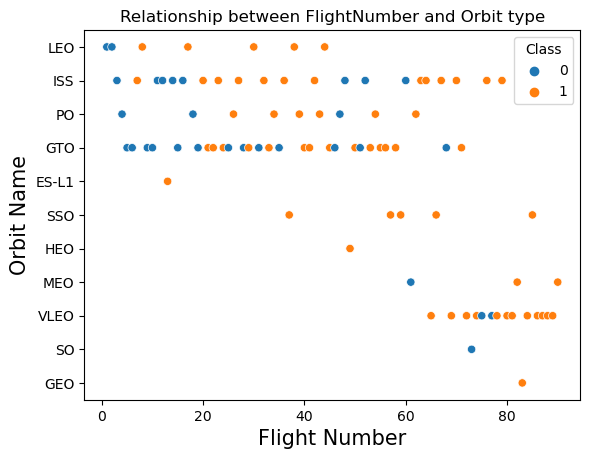

In [58]:
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Name", fontsize=15)
plt.title("Relationship between FlightNumber and Orbit type")
plt.show()

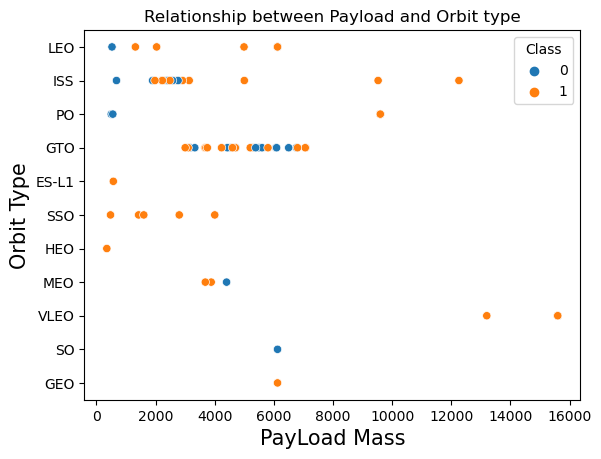

In [63]:
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.title('Relationship between Payload and Orbit type')
plt.xlabel('PayLoad Mass', fontsize=15)
plt.ylabel('Orbit Type', fontsize=15)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




In [93]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [94]:
date=Extract_year()

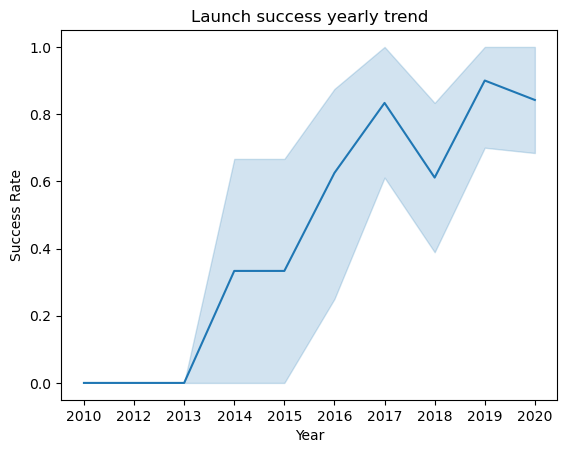

In [98]:
sns.lineplot(data=df, x=date, y='Class')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Success Rate', fontsize=10)
plt.title('Launch success yearly trend')
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


In [99]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [106]:
features_one_hot=pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
